# [安装](https://pytorch.org/get-started/locally/)

~~~
pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
~~~

In [130]:
import torch

x = torch.rand(5, 3)
print(x)
print(f'torch.__version__={torch.__version__}') 
print(f'torch.cuda.is_available()={torch.cuda.is_available()}')

tensor([[0.1599, 0.9283, 0.9837],
        [0.4787, 0.4014, 0.4959],
        [0.3687, 0.1401, 0.0792],
        [0.5600, 0.1107, 0.5074],
        [0.4139, 0.3714, 0.7066]])
torch.__version__=2.0.0+cu118
torch.cuda.is_available()=True


# [快速入门](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

## 数据

**ToTensor** converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]

In [124]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)



In [125]:
print(type(training_data), dir(training_data))  

<class 'torchvision.datasets.mnist.FashionMNIST'> ['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']


In [126]:
print(training_data.data.shape)
print(training_data.targets.shape)

print(test_data.data.shape)
print(test_data.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [127]:
test_data.data[0,10:20,10:20]

tensor([[  0,   0,   0,   4,   0,  53, 129, 120, 147, 175],
        [  0,   0,   2,   0,  11, 137, 130, 128, 160, 176],
        [  0,   3,   0,   0, 115, 114, 106, 137, 168, 153],
        [  3,   0,   0,  89, 139,  90,  94, 153, 149, 131],
        [  0,   0,  98, 136, 110, 109, 110, 162, 135, 144],
        [ 26, 108, 117,  99, 111, 117, 136, 156, 134, 154],
        [117, 111, 103, 115, 129, 134, 143, 154, 165, 170],
        [111, 113, 118, 127, 125, 139, 133, 136, 160, 140],
        [135, 136, 143, 126, 127, 151, 154, 143, 148, 125],
        [108, 106, 119, 120, 129, 149, 156, 167, 190, 190]], dtype=torch.uint8)

In [128]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    print(X[0,0,10:20,10:20])
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
tensor([[0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.2078, 0.5059, 0.4706, 0.5765,
         0.6863],
        [0.0000, 0.0000, 0.0078, 0.0000, 0.0431, 0.5373, 0.5098, 0.5020, 0.6275,
         0.6902],
        [0.0000, 0.0118, 0.0000, 0.0000, 0.4510, 0.4471, 0.4157, 0.5373, 0.6588,
         0.6000],
        [0.0118, 0.0000, 0.0000, 0.3490, 0.5451, 0.3529, 0.3686, 0.6000, 0.5843,
         0.5137],
        [0.0000, 0.0000, 0.3843, 0.5333, 0.4314, 0.4275, 0.4314, 0.6353, 0.5294,
         0.5647],
        [0.1020, 0.4235, 0.4588, 0.3882, 0.4353, 0.4588, 0.5333, 0.6118, 0.5255,
         0.6039],
        [0.4588, 0.4353, 0.4039, 0.4510, 0.5059, 0.5255, 0.5608, 0.6039, 0.6471,
         0.6667],
        [0.4353, 0.4431, 0.4627, 0.4980, 0.4902, 0.5451, 0.5216, 0.5333, 0.6275,
         0.5490],
        [0.5294, 0.5333, 0.5608, 0.4941, 0.4980, 0.5922, 0.6039, 0.5608, 0.5804,
         0.4902],
        [0.4235

In [29]:
print(type(train_dataloader), dir(train_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'> ['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_index_sampler', '_is_protocol', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']


In [33]:
print(len(train_dataloader.dataset), type(train_dataloader.dataset)) 

60000 <class 'torchvision.datasets.mnist.FashionMNIST'>


## 创建模型

In [21]:
# Get cpu, gpu or mps device for training.
# mps: 使用苹果的Metal Performance Shaders（MPS）作为PyTorch的后端，可以实现加速GPU训练。
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## 模型参数优化

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [34]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    # model.train()的作用是启用 Batch Normalization 和 Dropout。
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    # model.eval()的作用是不启用 Batch Normalization 和 Dropout。
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")            

In [35]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304703  [   64/60000]
loss: 2.282992  [ 6464/60000]
loss: 2.265572  [12864/60000]
loss: 2.269515  [19264/60000]
loss: 2.239511  [25664/60000]
loss: 2.215193  [32064/60000]
loss: 2.236331  [38464/60000]
loss: 2.194202  [44864/60000]
loss: 2.195833  [51264/60000]
loss: 2.163051  [57664/60000]
Test Error: 
 Accuracy: 43.2%, Avg loss: 2.149062 

Epoch 2
-------------------------------
loss: 2.162719  [   64/60000]
loss: 2.146523  [ 6464/60000]
loss: 2.081610  [12864/60000]
loss: 2.113500  [19264/60000]
loss: 2.047566  [25664/60000]
loss: 1.981864  [32064/60000]
loss: 2.034997  [38464/60000]
loss: 1.935222  [44864/60000]
loss: 1.956576  [51264/60000]
loss: 1.890763  [57664/60000]
Test Error: 
 Accuracy: 53.0%, Avg loss: 1.870532 

Epoch 3
-------------------------------
loss: 1.907333  [   64/60000]
loss: 1.873542  [ 6464/60000]
loss: 1.742480  [12864/60000]
loss: 1.806811  [19264/60000]
loss: 1.683257  [25664/60000]
loss: 1.628875  [32064/600

## 保存模型

In [37]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## 加载模型

In [38]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [39]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# model.eval()的作用是不启用 Batch Normalization 和 Dropout。
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


# [Tensor](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

In [41]:
import torch
import numpy as np

## 初始化Tensor

In [46]:
print('-'*50)
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(type(x_data), x_data.shape)

print('-'*50)
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(type(x_np), x_np.shape)

print('-'*50)
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

print('-'*50)
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

print('-'*50)
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

--------------------------------------------------
<class 'torch.Tensor'> torch.Size([2, 2])
--------------------------------------------------
<class 'torch.Tensor'> torch.Size([2, 2])
--------------------------------------------------
Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

--------------------------------------------------
Random Tensor: 
 tensor([[0.8294, 0.6385],
        [0.0687, 0.6592]]) 

--------------------------------------------------
Random Tensor: 
 tensor([[0.2051, 0.5373, 0.3993],
        [0.5936, 0.1841, 0.1124]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor的属性

In [47]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor操作

In [ ]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [60]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

print('-'*50)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)



First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
--------------------------------------------------
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [65]:
print('-'*50)
# Arithmetic operations
tensor = torch.ones(4, 3) * 2 
tensor[:,1] = 0

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print(y3)
torch.testing.assert_close(y1, y2)
torch.testing.assert_close(y1, y3)


print('-'*50)
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z3) 

torch.testing.assert_close(z1, z2)
torch.testing.assert_close(z2, z3)


--------------------------------------------------
tensor([[8., 8., 8., 8.],
        [8., 8., 8., 8.],
        [8., 8., 8., 8.],
        [8., 8., 8., 8.]])
--------------------------------------------------
tensor([[4., 0., 4.],
        [4., 0., 4.],
        [4., 0., 4.],
        [4., 0., 4.]])


In [68]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

print('-'*25, 'inplace', '-'*25)
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

16.0 <class 'float'>
------------------------- inplace -------------------------
tensor([[2., 0., 2.],
        [2., 0., 2.],
        [2., 0., 2.],
        [2., 0., 2.]]) 

tensor([[7., 5., 7.],
        [7., 5., 7.],
        [7., 5., 7.],
        [7., 5., 7.]])


## 和NumPy互操作

In [73]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

print('-'*25, 'change value', '-'*25)
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
------------------------- change value -------------------------
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [74]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# [DATASET 和 DATALOADER](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



## 加载 Dataset

In [85]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 遍历和可视化 Dataset

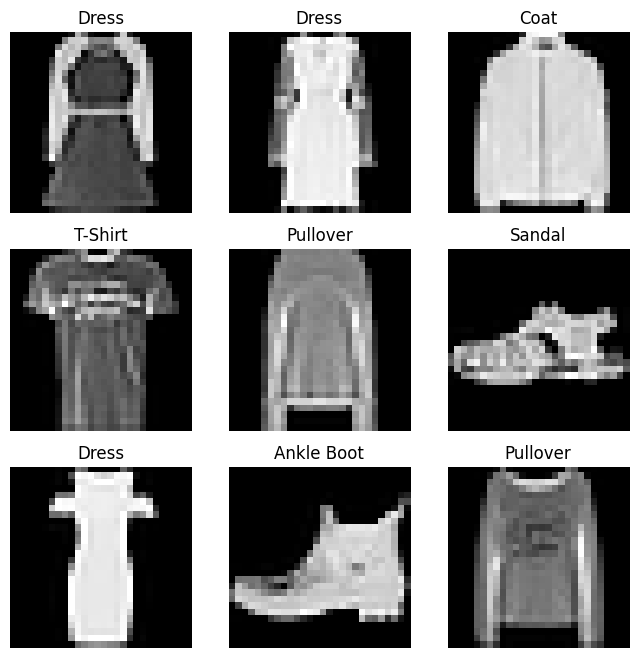

In [86]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 创建自定义数据集

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## 使用 DataLoader

In [87]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


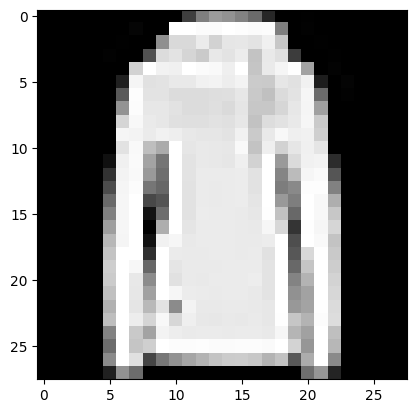

Label: 2


In [88]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# [自动微分](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

In [1]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensor, 函数和计算图

Tensors, Functions and Computational graph

![](https://pytorch.org/tutorials/_images/comp-graph.png)

In [2]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7fe600085040>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fe5377e57f0>


In [3]:
 [m for m in dir(x) if m.find('grad')>=0]  

['_grad',
 '_grad_fn',
 'grad',
 'grad_fn',
 'requires_grad',
 'requires_grad_',
 'retain_grad',
 'retains_grad']

In [4]:
print(f"x.requires_grad={x.requires_grad}")
print(f"y.requires_grad={y.requires_grad}")
print(f"w.requires_grad={w.requires_grad}")
print(f"b.requires_grad={b.requires_grad}")
print(f"z.requires_grad={z.requires_grad}")
print(f"loss.requires_grad={loss.requires_grad}") 

x.requires_grad=False
y.requires_grad=False
w.requires_grad=True
b.requires_grad=True
z.requires_grad=True
loss.requires_grad=True


In [5]:
print(f"x.retains_grad={x.retains_grad}")
print(f"y.retains_grad={y.retains_grad}")
print(f"w.retains_grad={w.retains_grad}")
print(f"b.retains_grad={b.retains_grad}")
print(f"z.retains_grad={z.retains_grad}")
print(f"loss.retains_grad={loss.retains_grad}") 

x.retains_grad=False
y.retains_grad=False
w.retains_grad=False
b.retains_grad=False
z.retains_grad=False
loss.retains_grad=False


## 计算梯度


在计算图中，要获得grad, 需要满足：
- 叶子节点
- requires_grad = True

In [6]:
loss.backward()

# print(f"x.grad={x.grad}")
# print(f"y.grad={y.grad}")
print(f"w.grad={w.grad}")
print(f"b.grad={b.grad}")
# print(f"z.grad={z.grad}")
# print(f"loss.grad={loss.grad}") 

w.grad=tensor([[0.2084, 0.0814, 0.0547],
        [0.2084, 0.0814, 0.0547],
        [0.2084, 0.0814, 0.0547],
        [0.2084, 0.0814, 0.0547],
        [0.2084, 0.0814, 0.0547]])
b.grad=tensor([0.2084, 0.0814, 0.0547])


## 禁止梯度跟踪

In [7]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [8]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## 雅各比矩阵
Tensor Gradients and Jacobian Products



In [186]:
inp = torch.eye(4, 5, requires_grad=True)
print(f'inp={inp}') 
out = (inp+1).pow(2).t()
print(f'out={out}')

out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

inp=tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]], requires_grad=True)
out=tensor([[4., 1., 1., 1.],
        [1., 4., 1., 1.],
        [1., 1., 4., 1.],
        [1., 1., 1., 4.],
        [1., 1., 1., 1.]], grad_fn=<TBackward0>)
First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


以下代码参见 [详解Pytorch 自动微分里的（vector-Jacobian product）](https://zhuanlan.zhihu.com/p/65609544)

In [10]:
x = torch.randn(3, requires_grad = True)
y = x**2
y.backward(torch.ones(3))

print(f'x={x}')
print(f'x.grad={x.grad}')

x=tensor([ 0.9078,  0.9872, -0.7214], requires_grad=True)
x.grad=tensor([ 1.8156,  1.9744, -1.4427])


In [12]:
x1=torch.tensor(1, requires_grad=True, dtype = torch.float)
x2=torch.tensor(2, requires_grad=True, dtype = torch.float)
x3=torch.tensor(3, requires_grad=True, dtype = torch.float)

y=torch.randn(3) 
y[0]=x1**2+2*x2+x3
y[1]=x1+x2**3+x3**2
y[2]=2*x1+x2**2+x3**3

y.backward(torch.ones(3))
print(x1.grad, x2.grad, x3.grad) 

tensor(5.) tensor(18.) tensor(34.)
